## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [ ]:
!pip install pycodestyle
!pip install --index-url https://test.pypi.org/simple/ nbpep8
from nbpep8.nbpep8 import pep8
pep8(_ih)

In [2]:
import pandas as pd
import numpy as np
from numpy import linalg as linalg
import matplotlib.pyplot as plt
pep8(_ih)

In [3]:
from google.colab import drive
drive.mount('/content/drive')
pep8(_ih)

Mounted at /content/drive



In [ ]:
def read_data(root_path):
  x_train = pd.read_csv(root_path + "x_train.csv").values
  y_train = pd.read_csv(root_path + "y_train.csv").values[:, 0]
  x_test = pd.read_csv(root_path + "x_test.csv").values
  y_test = pd.read_csv(root_path + "y_test.csv").values[:, 0]

  print(x_train.shape)
  print(y_train.shape)
  print(x_test.shape)
  print(y_test.shape)

  return x_train, y_train, x_test, y_test


pep8(_ih)

In [5]:
dir = "/content/drive/MyDrive/四下/pattern_recognition/HW/HW2/"
# dir = ""
x_train, y_train, x_test, y_test = read_data(dir)
pep8(_ih)

(750, 2)
(750,)
(250, 2)
(250,)



## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [7]:
c1 = np.array(x_train[y_train == 0])
c2 = np.array(x_train[y_train == 1])
m1 = np.mean(c1, axis=0)
m2 = np.mean(c2, axis=0)
pep8(_ih)

In [8]:
assert m1.shape == (2,)
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")
pep8(_ih)

mean vector of class 1: [2.47107265 1.97913899] mean vector of class 2: [1.82380675 3.03051876]



## 2. Compute the Within-class scatter matrix SW

In [9]:
diff_c1_m1 = np.subtract(c1, m1)
diff_c2_m2 = np.subtract(c2, m2)
s1 = np.matmul(diff_c1_m1.T, diff_c1_m1)
s2 = np.matmul(diff_c2_m2.T, diff_c2_m2)
sw = np.add(s1, s2)
pep8(_ih)

In [10]:
assert sw.shape == (2, 2)
print(f"Within-class scatter matrix SW: {sw}")
pep8(_ih)

Within-class scatter matrix SW: [[140.40036447  -5.30881553]
 [ -5.30881553 138.14297637]]



## 3.  Compute the Between-class scatter matrix SB

In [11]:
diff_m2_m1 = np.array(m2 - m1)[:, np.newaxis]
sb = np.matmul((diff_m2_m1), (diff_m2_m1).T)
pep8(_ih)

In [12]:
assert sb.shape == (2, 2)
print(f"Between-class scatter matrix SB: {sb}")
pep8(_ih)

Between-class scatter matrix SB: [[ 0.41895314 -0.68052227]
 [-0.68052227  1.10539942]]



## 4. Compute the Fisher’s linear discriminant

In [13]:
w = np.dot(linalg.inv(sw), diff_m2_m1)
w = w / linalg.norm(w)
pep8(_ih)

In [14]:
assert w.shape == (2, 1)
print(f" Fisher’s linear discriminant: {w}")
pep8(_ih)

 Fisher’s linear discriminant: [[-0.50266214]
 [ 0.86448295]]



## 5. Project the test data by linear discriminant and get the class prediction by nearest-neighbor rule.  Calculate the accuracy score 
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [ ]:
def accuracy(label, preds):
  total = label.shape[0]
  correct = 0.0
  for i, pred in enumerate(preds):
    if(label[i] == pred):
      correct += 1.0
  return correct/total


def knn(x_test, x_train, y_train, k):
  y_pred = []
  for i, x in enumerate(x_test):
    # select k nearest points to x
    dists = np.square(x_train - float(x))
    dist_pairs = [(dists[j], j) for j in range(len(x_train))]
    k_dists = sorted(dist_pairs, key=lambda x: x[0])[:k]

    # count the votes
    pred_sum = 0
    for j in range(k):
      idx = k_dists[j][1]
      pred_sum += y_train[idx]

    # make prediction based on majority voting
    if (pred_sum) < k/2:
      y_pred.append(0)
    else:
      y_pred.append(1)
  return y_pred


def nearset_mean(x_test, m1, m2):
  y_pred = []
  for i, x in enumerate(x_test):
    dist_m1 = linalg.norm(np.subtract(x, m1))
    dist_m2 = linalg.norm(np.subtract(x, m2))
  if dist_m1 < dist_m2:
    y_pred.append(0)
  else:
    y_pred.append(1)
  return y_pred


pep8(_ih)

In [33]:
proj_x_train = np.matmul(x_train, w)
proj_x_test = np.matmul(x_test, w)

# Make prediction based on knn
y_pred = knn(proj_x_test, proj_x_train, y_train, k=10)

# Make prediction based on nearst mean
# y_pred = nearset_mean(x_test, m1, m2)
pep8(_ih)

In [34]:
acc = accuracy(y_test, y_pred)
print(f"Accuracy of test-set {acc}")
pep8(_ih)

Accuracy of test-set 0.912



## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

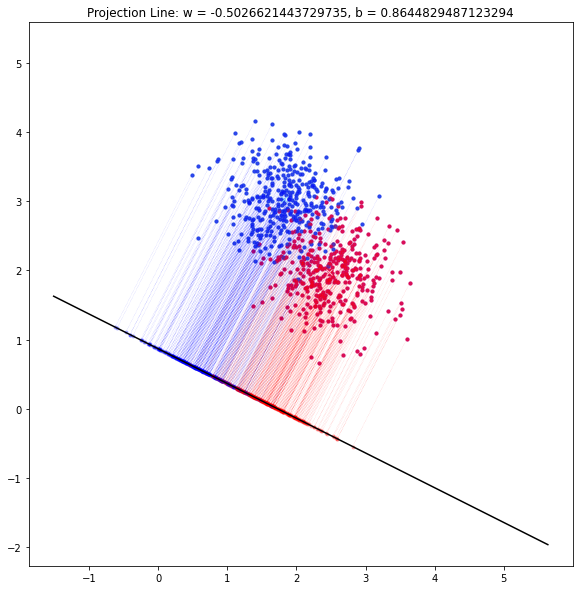

In [35]:
# setting
plt.figure(figsize=(10, 10))
color_c1 = "mediumvioletred"
color_c2 = "royalblue"
color_c11 = "lightpink"
color_c21 = "lightskyblue"

# boundary
W = w.reshape(2,)
min_x, max_x = (np.min(x_train[:, 0]) - 2, np.max(x_train[:, 0]) + 2)
min_y, max_y = (np.min(x_train[:, 1]) - 2, np.max(x_train[:, 1]) + 2)

# scatter
plt.scatter(c1[:, 0], c1[:, 1], s=10, c=color_c1, zorder=1)
plt.scatter(c2[:, 0], c2[:, 1], s=10, c=color_c2, zorder=1)
plt.plot(m1[0], m1[1], 'cx', color=color_c11, zorder=2)
plt.plot(m2[0], m2[1], 'yx', color=color_c21, zorder=2)

# line
v0 = np.array([min_x, min_x * W[0] + W[1]])
v1 = np.array([max_x, max_x * W[0] + W[1]])
plt.plot([v0[0], v1[0]], [v0[1], v1[1]], c='k')

# projection
v_line = np.subtract(v1, v0)
v_line /= linalg.norm(v_line)

for i in range(len(x_train)):
    # project point pi onto the line
    # The projected point pt = v0 + v0 · v0_pi / |v0|^2
    pi = x_train[i]
    vec_v0_pi = np.subtract(pi, v0)
    prj = v_line * v_line.dot(vec_v0_pi)
    pt = np.add(prj, v0)

    if y_train[i] == 0:
        plt.plot(
                [pt[0], pi[0]], [pt[1], pi[1]], 'r.:',
                alpha=0.25, linewidth=0.5, zorder=1)
    else:
        plt.plot(
            [pt[0], pi[0]], [pt[1], pi[1]], 'b.:',
            alpha=0.25, linewidth=0.5, zorder=1)

plt.title(f"Projection Line: w = {W[0]}, b = {W[1]}")
plt.gca().axis('square')
plt.show()
pep8(_ih)